In [ ]:
  #importing libraries

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns


In [ ]:
#upload the data

In [ ]:
df = pd.read_csv("/content/Churn_Modelling.csv")


In [ ]:
#reading the data

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
#deleting unnessery columns

In [ ]:
df.drop('CustomerId', axis='columns', inplace=True)

In [ ]:
df.drop('RowNumber', axis='columns', inplace=True)

In [ ]:
df.drop('Surname', axis='columns', inplace=True)

In [ ]:
#checking on the updates

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
#navigating data frame types

In [ ]:
df.dtypes

,0
CreditScore,int64
Geography,object
Gender,object
Age,int64
Tenure,int64
Balance,float64
NumOfProducts,int64
HasCrCard,int64
IsActiveMember,int64
EstimatedSalary,float64


In [ ]:
#checking null values

In [ ]:
df.isnull().sum()

,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0
IsActiveMember,0
EstimatedSalary,0


In [ ]:
#exploring data

In [ ]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


**part 2 (analysis)**


In [ ]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [ ]:
df.shape

(10000, 11)

In [ ]:
#check for duplicated
df.duplicated().sum()

0

In [ ]:
# check for NaNa values
df.isna().sum()

,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0
IsActiveMember,0
EstimatedSalary,0


In [ ]:
#define unique values

for column in df.columns:
  print('{}:{}'.format(column, df[column].nunique()))

CreditScore:460
Geography:3
Gender:2
Age:70
Tenure:11
Balance:6382
NumOfProducts:4
HasCrCard:2
IsActiveMember:2
EstimatedSalary:9999
Exited:2


In [ ]:

#define unique values for unnumerical data

for column in df.columns:
  if df[column].dtype=='object':
    print('{}:{}'.format(column, df[column].unique()))

Geography:['France' 'Spain' 'Germany']
Gender:['Female' 'Male']


In [ ]:
# define min and  max value for every column
for column in df.columns:
  print('{}:{}:{}'.format(column, df[column].min(),df[column].max()))

CreditScore:350:850
Geography:France:Spain
Gender:Female:Male
Age:18:92
Tenure:0:10
Balance:0.0:250898.09
NumOfProducts:1:4
HasCrCard:0:1
IsActiveMember:0:1
EstimatedSalary:11.58:199992.48
Exited:0:1


In [ ]:
df['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [ ]:
df['IsActiveMember'].value_counts()

,count
IsActiveMember,
1,5151
0,4849


In [ ]:
df['Gender'].value_counts()

,count
Gender,
Male,5457
Female,4543




**what is the gender of customer in each region ??**


In [ ]:
df.groupby('Geography')['Gender'].value_counts()

Geography  Gender
France     Male      2753
           Female    2261
Germany    Male      1316
           Female    1193
Spain      Male      1388
           Female    1089
Name: count, dtype: int64

**what is the minmum and maximum age for each gender **

In [ ]:
df.groupby('Gender')['Age'].agg(['min', 'max'])

,min,max
Gender,,
Female,18,85
Male,18,92


In [ ]:
df['HasCrCard'].value_counts()

,count
HasCrCard,
1,7055
0,2945


In [ ]:
df['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


**what is the minmum, maximum of balance in the dataset ??**

In [ ]:
df['Balance'].agg(['min','max'])

,Balance
min,0.00
max,250898.09


**what is minmum , maximum , mean credit score in the dataset?**

In [ ]:
df['CreditScore'].agg(['min','max','mean'])

,CreditScore
min,350.0000
max,850.0000
mean,650.5288


In [ ]:
df[df['CreditScore'] > 700]['Exited'].value_counts()

,count
Exited,
0,2497
1,619


**What is the average credit score for exited vs. not exited customers?**

In [ ]:
df.groupby('Exited')['CreditScore'].mean()   # this is not be useful becouse the dataset is unbalanced

,CreditScore
Exited,
0,651.853196
1,645.351497


**Does geography influence the likelihood of customers having high or low credit scores?**

In [ ]:
df.groupby('Geography')['CreditScore'].mean()

,CreditScore
Geography,
France,649.668329
Germany,651.453567
Spain,651.333872


In [ ]:
df.groupby('Geography')['Exited'].value_counts()  # customers from spain are more loyal

Geography  Exited
France     0         4204
           1          810
Germany    0         1695
           1          814
Spain      0         2064
           1          413
Name: count, dtype: int64

In [ ]:
df.groupby('Exited')['Gender'].value_counts()

Exited  Gender
0       Male      4559
        Female    3404
1       Female    1139
        Male       898
Name: count, dtype: int64

**what is the mean Estimated annual Salary for customers ??**

In [ ]:
df.groupby('Exited')['EstimatedSalary'].mean()

,EstimatedSalary
Exited,
0,99738.391772
1,101465.677531


what is the maximam number of years the customer has been with the bank




In [ ]:
df['Tenure'].max()

10

**what is the min number of years the customer has been with the bank.**

In [ ]:
df['Tenure'].min()

0

**Do customers with longer tenure is exited or retain **customers**

In [ ]:
df[df['Tenure']==df['Tenure'].max()]['Exited'].value_counts()

,count
Exited,
0,389
1,101


**Do customers with longer tenures tend to have higher credit scores?**

In [ ]:
df[df['Tenure']==df['Tenure'].max()]['CreditScore'].mean()

653.7163265306123

**is the customer with longer tenures and higher credit score is exited or retain customer ???**

In [ ]:
df[df['Tenure']==df['Tenure'].max()][df['CreditScore'] > 700]['Exited'].value_counts()  #out of 162

<ipython-input-43-8c725d7fc9be>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['Tenure']==df['Tenure'].max()][df['CreditScore'] > 700]['Exited'].value_counts()  #out of 162


,count
Exited,
0,124
1,38




**what is the maximum and minimum age for customers who exited from bank ??**


In [ ]:
df[df['Exited']==1]['Age'].agg(['min','max'])

,Age
min,18
max,84




**what is the mean number of years the customer has been with the bank.??**


In [ ]:
df[df['Exited']==1]['Tenure'].mean()

4.932744231713304

**is the exited customer have credit card or not ?**

In [ ]:
df[df['Exited']==1]['HasCrCard'].value_counts()

,count
HasCrCard,
1,1424
0,613


**IS the exited customer is active member or not ?**

In [ ]:
df[df['Exited']==1]['IsActiveMember'].value_counts()

,count
IsActiveMember,
0,1302
1,735


**what is the maximum , minmum, mean for estimated annual salary of the exited customer??**

In [ ]:
df[df['Exited']==1]['EstimatedSalary'].agg(['min','max','mean'])

,EstimatedSalary
min,11.580000
max,199808.100000
mean,101465.677531


**what is the number of products the customer holds with the bank??**

In [ ]:
df[df['Exited']==1]['NumOfProducts'].value_counts()

,count
NumOfProducts,
1,1409
2,348
3,220
4,60


**How many accounts retained customers have??**

In [ ]:
df[df['Exited']==0]['NumOfProducts'].value_counts()

,count
NumOfProducts,
2,4242
1,3675
3,46


**what is the minmum, maximum of balance for exited  customers ??**

In [ ]:
df[df['Exited']==0]['Balance'].agg(['min','max','mean'])

,Balance
min,0.000000
max,221532.800000
mean,72745.296779


**what is the gender of exited customers ??**

In [ ]:
df[df['Exited']==1]['Gender'].value_counts()

,count
Gender,
Female,1139
Male,898


**Which region has the highest number of exited customers ??**

In [ ]:
df[df['Exited']==1]['Geography'].value_counts()

,count
Geography,
Germany,814
France,810
Spain,413


In [ ]:
# Distribution of the target variable barchart

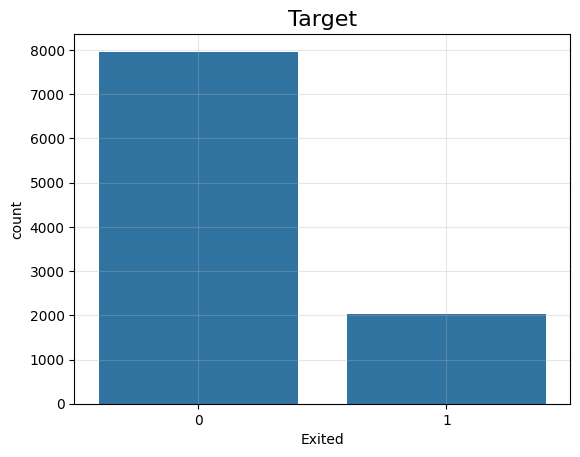

In [ ]:
sns.countplot(x='Exited', data=df)
plt.grid(axis='both', alpha=0.30)
plt.title('Target', fontsize=16)
plt.show()

In [ ]:
# Plot histograms for numerical columns

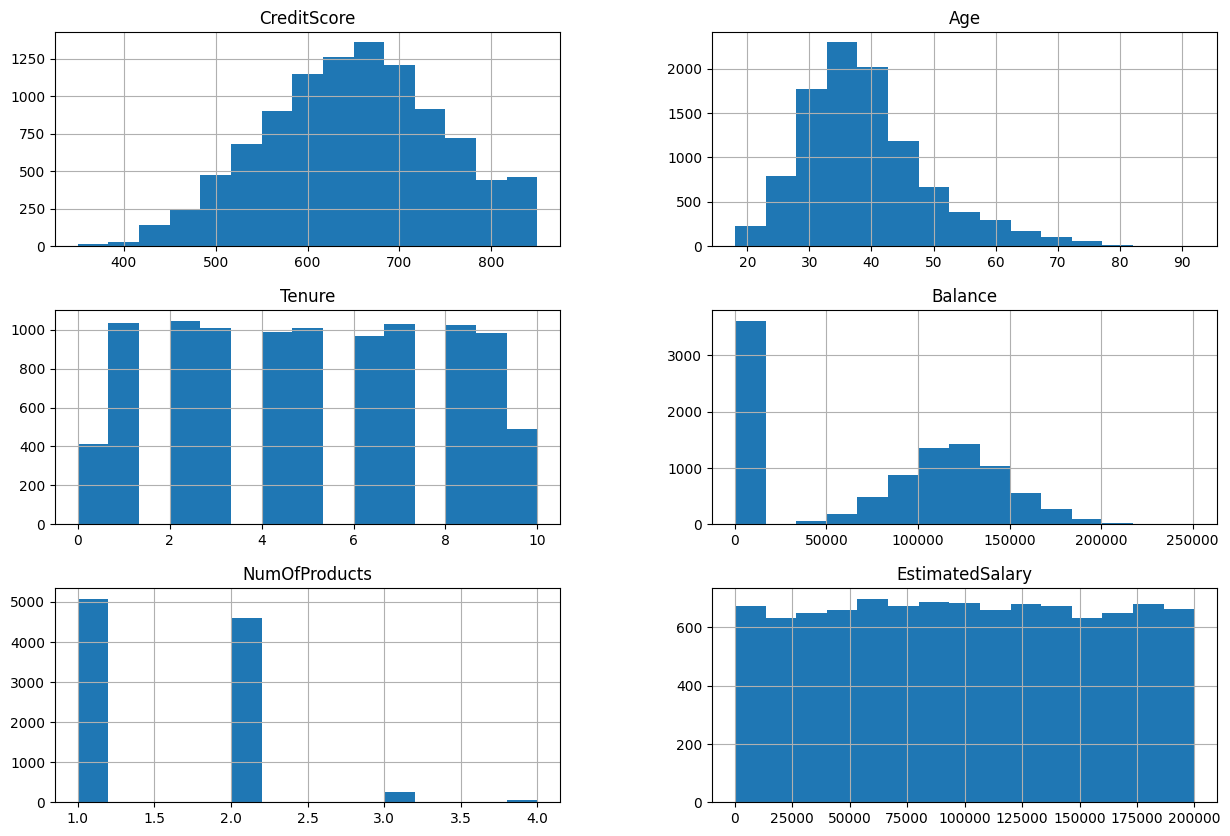

In [ ]:
numeric_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
df[numeric_features].hist(bins=15, figsize=(15, 10), layout=(3, 2));

In [ ]:
# Credit Score vs. Exited boxplot

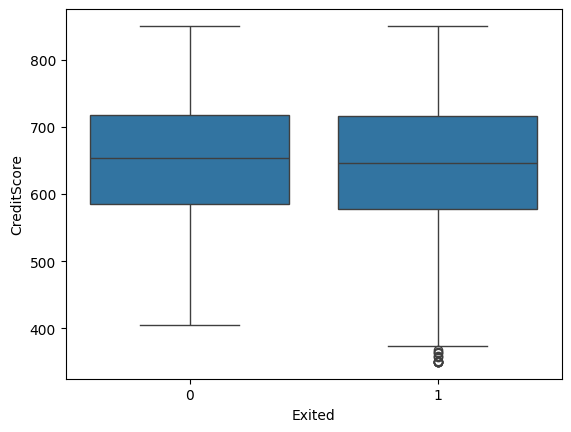

In [ ]:
sns.boxplot(x='Exited', y='CreditScore', data=df)
plt.show()

In [ ]:
# Age distribution of exited vs retained customers

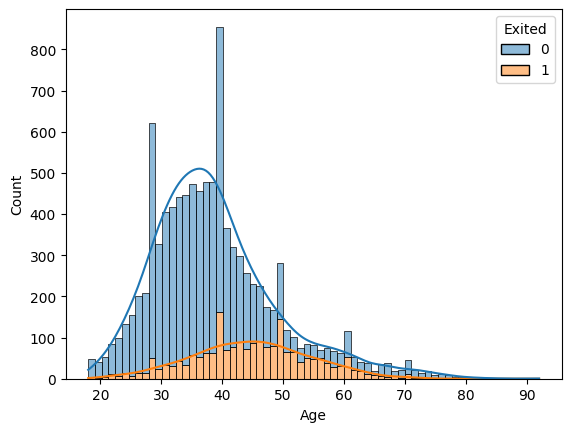

In [ ]:
sns.histplot(data=df, x='Age', hue='Exited', multiple='stack', kde=True)
plt.show()

In [ ]:
# Correlation heatmap

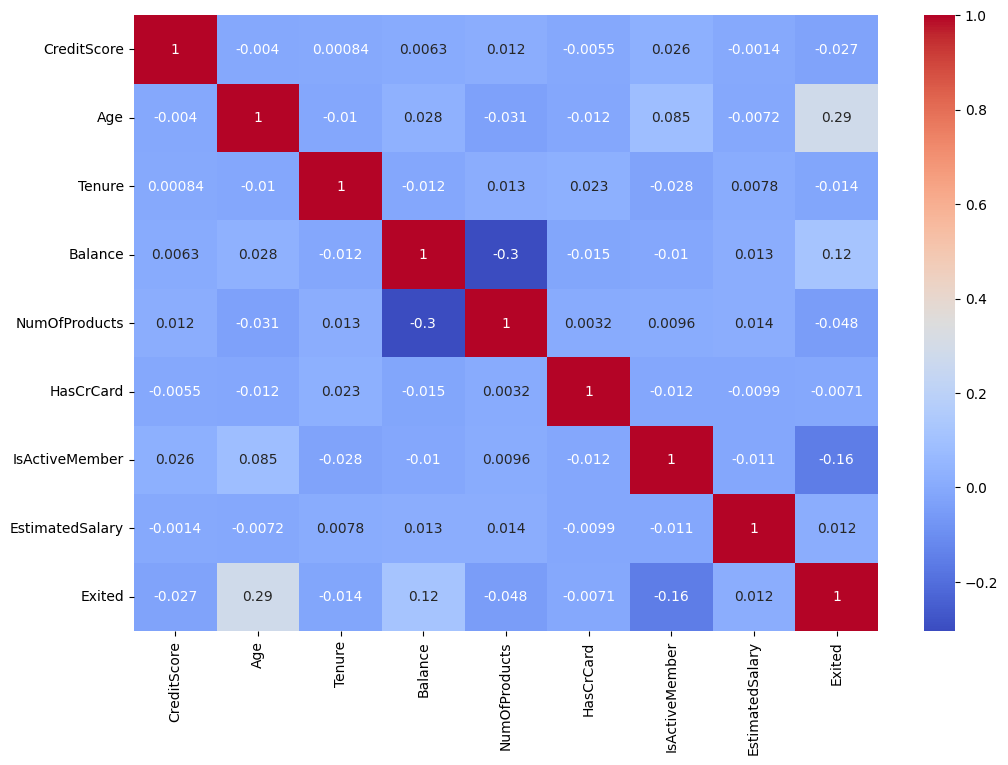

In [ ]:
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.show()



>



# Preparing Data For Modelling

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# **DATA** **ENCODING**

In [ ]:
df1 = pd.get_dummies(df[df['Age'] < 85], columns=['Geography', 'Gender'], drop_first=False) # filtering outliers of age
df1.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,True,False,False,True,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,False,True,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,True,False,False,True,False
3,699,39,1,0.00,2,0,0,93826.63,0,True,False,False,True,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,False,True,True,False


In [ ]:
df1.dtypes

,0
CreditScore,int64
Age,int64
Tenure,int64
Balance,float64
NumOfProducts,int64
HasCrCard,int64
IsActiveMember,int64
EstimatedSalary,float64
Exited,int64
Geography_France,bool


In [ ]:
encoded_cols = ['Geography_Germany', 'Geography_Spain', 'Gender_Male', 'Geography_France', 'Gender_Female']
df1[encoded_cols] = df1[encoded_cols].astype('int64')

In [ ]:
df1.dtypes

,0
CreditScore,int64
Age,int64
Tenure,int64
Balance,float64
NumOfProducts,int64
HasCrCard,int64
IsActiveMember,int64
EstimatedSalary,float64
Exited,int64
Geography_France,int64


In [ ]:
df1.drop('Exited', axis = 1, inplace = True)
df1['Exited'] = df[df['Age'] < 85]['Exited']

In [ ]:
df1.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Exited
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0,1
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0,1
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,1,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0,0


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9996 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        9996 non-null   int64  
 1   Age                9996 non-null   int64  
 2   Tenure             9996 non-null   int64  
 3   Balance            9996 non-null   float64
 4   NumOfProducts      9996 non-null   int64  
 5   HasCrCard          9996 non-null   int64  
 6   IsActiveMember     9996 non-null   int64  
 7   EstimatedSalary    9996 non-null   float64
 8   Geography_France   9996 non-null   int64  
 9   Geography_Germany  9996 non-null   int64  
 10  Geography_Spain    9996 non-null   int64  
 11  Gender_Female      9996 non-null   int64  
 12  Gender_Male        9996 non-null   int64  
 13  Exited             9996 non-null   int64  
dtypes: float64(2), int64(12)
memory usage: 1.1 MB


# **DATA SCALING**

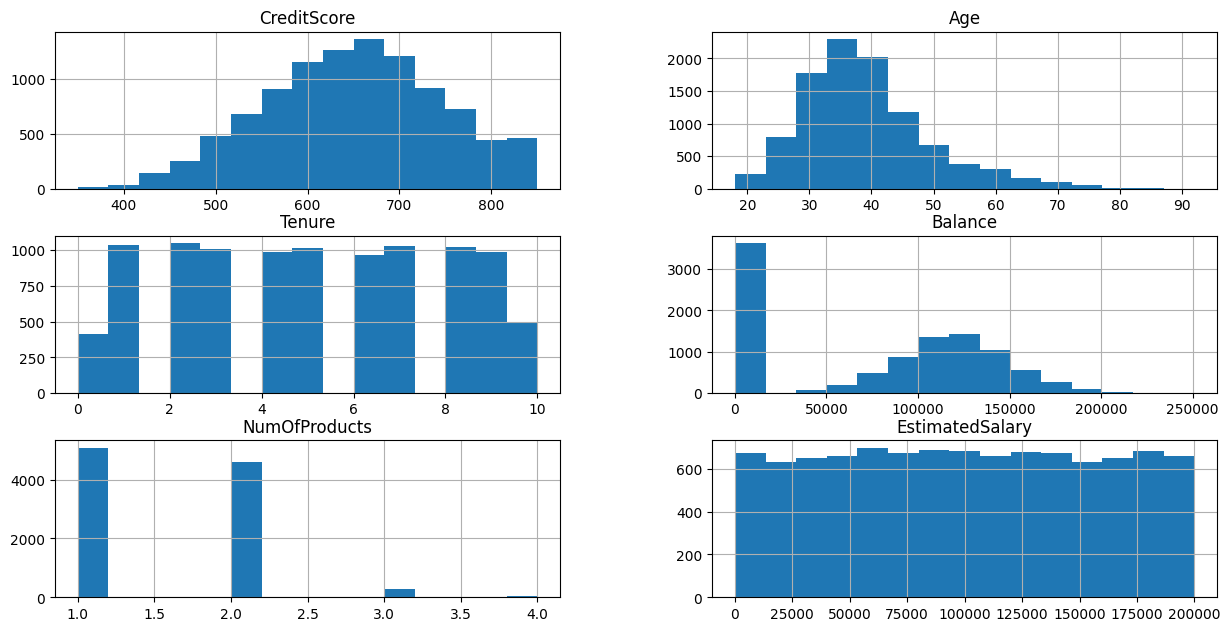

In [ ]:
numeric_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
df[numeric_features].hist(bins=15, figsize=(15, 10), layout=(4, 2));

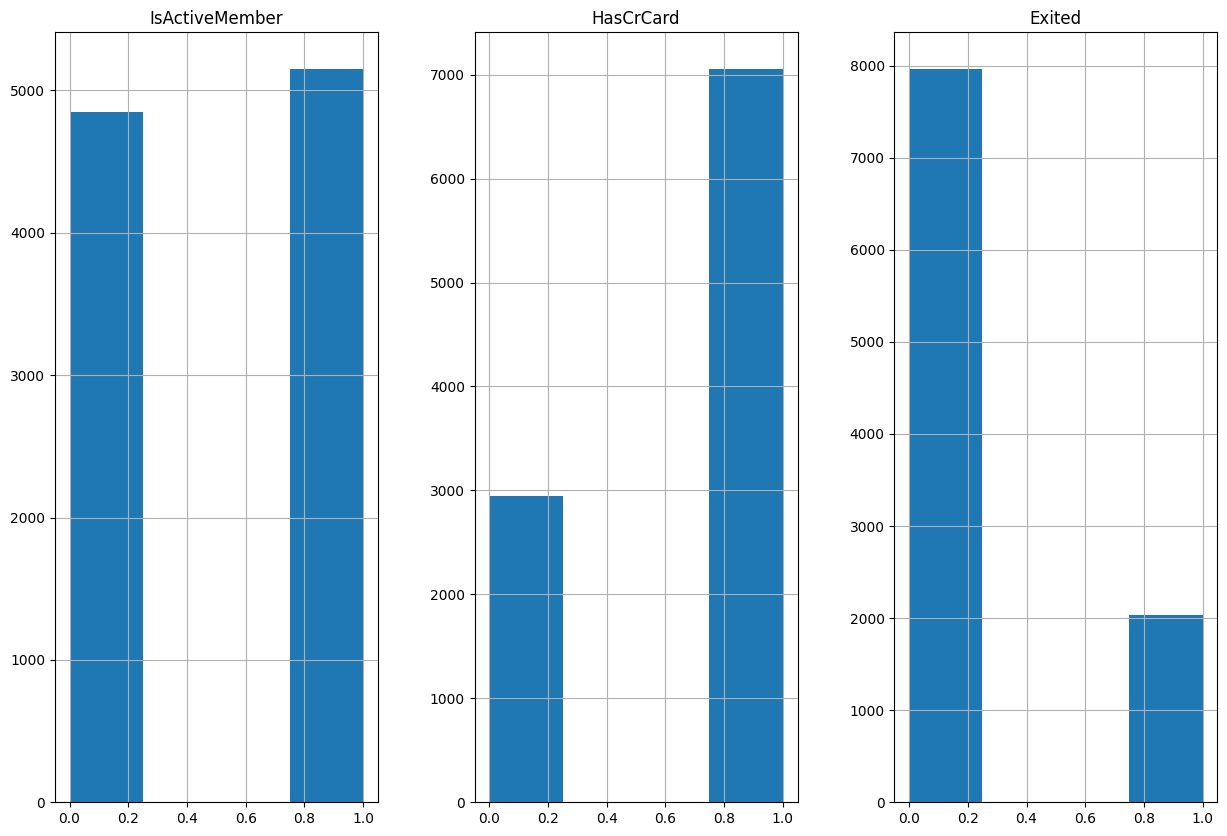

In [ ]:
bool_columns = ['IsActiveMember', 'HasCrCard', 'Exited']
df[bool_columns].hist(bins = 4, figsize=(15, 10), layout=(1, 3));

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

> **Standard Scaler** is determined to produce scaled data with mean value of 0 and standard deviation of 1 ---> preferable to be used on **Gaussian Distributed Data**


> **MinMaxScaler** is determined to produce data between the range [0, 1] ---> preferably used with **Non-Gaussian distributed data**








In [ ]:
min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

In [ ]:
cols_minmax = ['Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
df1[cols_minmax] = min_max_scaler.fit_transform(df1[cols_minmax])

In [ ]:
cols_standard = ['CreditScore', 'Age']
df1[cols_standard] = standard_scaler.fit_transform(df1[cols_standard])

In [ ]:
df1.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Exited
0,-0.326084,0.296754,0.2,0.000000,0.000000,1,1,0.506735,1,0,0,1,0,1
1,-0.439907,0.200976,0.1,0.334031,0.000000,0,1,0.562709,0,0,1,1,0,0
2,-1.536745,0.296754,0.8,0.636357,0.666667,1,0,0.569654,1,0,0,1,0,1
3,0.501719,0.009419,0.1,0.000000,0.333333,0,0,0.469120,1,0,0,1,0,0
4,2.064196,0.392532,0.2,0.500246,0.000000,1,1,0.395400,0,0,1,1,0,0


In [ ]:
df1.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Exited
count,9.996000e+03,9.996000e+03,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.00000,9996.000000,9996.000000,9996.000000,9996.000000
mean,1.002266e-16,6.806169e-17,0.501240,0.304872,0.176704,0.705482,0.514906,0.500442,0.501301,0.25100,0.247699,0.454382,0.545618,0.203782
std,1.000050e+00,1.000050e+00,0.289154,0.248694,0.193897,0.455849,0.499803,0.287568,0.500023,0.43361,0.431698,0.497940,0.497940,0.402829
min,-3.109570e+00,-2.001928e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,-6.882475e-01,-6.610300e-01,0.300000,0.000000,0.000000,0.000000,0.000000,0.254977,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,1.538466e-02,-1.821380e-01,0.500000,0.387402,0.000000,1.000000,1.000000,0.500960,1.000000,0.00000,0.000000,0.000000,1.000000,0.000000
75%,6.905611e-01,4.883108e-01,0.700000,0.508776,0.333333,1.000000,1.000000,0.746955,1.000000,1.00000,0.000000,1.000000,1.000000,0.000000
max,2.064196e+00,4.319447e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


# **DATA SPLITTING**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df1.drop('Exited', axis=1)
y = df1['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

In [ ]:
# @title Default title text
y_train.value_counts()

,count
Exited,
0,6367
1,1629


1629/6367 = 25.58%          

In [ ]:
y_test.value_counts()

,count
Exited,
0,1592
1,408


408/1592 = 25.56%    

In [ ]:
df1['Exited'].value_counts()

,count
Exited,
0,7959
1,2037


2037/7959 = 25.59%

**Balancing Technique : USING SMOTE (Synthetic Minority Oversampling Technique)**

As we saw in the y_train.value_count(): there're 6367 examples on the Non-Exited customers but only 1629 examples on the Yes-Exited customers.



> Now, Don't you think that the model still have few "Yes-Exited" examples to learn with?


Here comes the **SMOTE** Technique to **generate** synthetic examples for the minor class to provide **BALANCE**


> i.e. it's applied only on the training set



In [ ]:
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

In [ ]:
smote_technique = SMOTE(random_state=42)

In [ ]:
X_train_balanced, y_train_balanced = smote_technique.fit_resample(X_train, y_train)

In [ ]:
y_train_balanced.value_counts()

,count
Exited,
0,6367
1,6367


**PERFECTLY BALANCED**


```



# **DATA SPLITTING**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df1.drop('Exited', axis=1)
y = df1['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

In [ ]:
y_train.value_counts()

,count
Exited,
0,6367
1,1629


1629/6367 = 25.58%          

In [ ]:
y_test.value_counts()

,count
Exited,
0,1592
1,408


408/1592 = 25.56%    

In [ ]:
df1['Exited'].value_counts()

,count
Exited,
0,7959
1,2037


2037/7959 = 25.59%

**Balancing Technique : USING SMOTE (Synthetic Minority Oversampling Technique)**

As we saw in the y_train.value_count(): there're 6367 examples on the Non-Exited customers but only 1629 examples on the Yes-Exited customers.



> Now, Don't you think that the model still have few "Yes-Exited" examples to learn with?


Here comes the **SMOTE** Technique to **generate** synthetic examples for the minor class to provide **BALANCE**


> i.e. it's applied only on the training set



In [ ]:
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

In [ ]:
smote_technique = SMOTE(random_state=42)

In [ ]:
X_train_balanced, y_train_balanced = smote_technique.fit_resample(X_train, y_train)

In [ ]:
y_train_balanced.value_counts()

,count
Exited,
0,6367
1,6367


**PERFECTLY BALANCED**


```



# **TRAINING THE MODEL**




In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
tree_model = DecisionTreeClassifier(random_state=42)
forest_model = RandomForestClassifier(random_state=42)
log_model = LogisticRegression(random_state=42)

In [ ]:
tree_model.fit(X_train_balanced, y_train_balanced)

DecisionTreeClassifier(random_state=42)

In [ ]:
forest_model.fit(X_train_balanced, y_train_balanced)

RandomForestClassifier(random_state=42)

In [ ]:
log_model.fit(X_train_balanced, y_train_balanced)

LogisticRegression(random_state=42)

In [ ]:
tree_y_pred = tree_model.predict(X_test)
forest_y_pred = forest_model.predict(X_test)
log_y_pred = log_model.predict(X_test)

# **Evaluating the Model**

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
tree_acc = accuracy_score(y_test, tree_y_pred)
forest_acc = accuracy_score(y_test, forest_y_pred)
log_acc = accuracy_score(y_test, log_y_pred)
print(f"Accuracy: {tree_acc}")
print(f"Accuracy: {forest_acc}")
print(f"Accuracy: {log_acc}")

Accuracy: 0.769
Accuracy: 0.8315
Accuracy: 0.7165


In [ ]:
print('The Classification report for the Decision Tree Model\n\n')
print(classification_report(y_test, tree_y_pred))

The Classification report for the Decision Tree Model


              precision    recall  f1-score   support

           0       0.88      0.83      0.85      1592
           1       0.45      0.55      0.49       408

    accuracy                           0.77      2000
   macro avg       0.66      0.69      0.67      2000
weighted avg       0.79      0.77      0.78      2000



In [ ]:

print('The Classification report for the RandomForest Tree Model\n\n')
print(classification_report(y_test, forest_y_pred))

The Classification report for the RandomForest Tree Model


              precision    recall  f1-score   support

           0       0.89      0.90      0.90      1592
           1       0.59      0.55      0.57       408

    accuracy                           0.83      2000
   macro avg       0.74      0.73      0.73      2000
weighted avg       0.83      0.83      0.83      2000



In [ ]:
print('The Classification report for the logistic Regression Model\n\n')
print(classification_report(y_test, log_y_pred))

The Classification report for the logistic Regression Model


              precision    recall  f1-score   support

           0       0.90      0.73      0.80      1592
           1       0.39      0.68      0.49       408

    accuracy                           0.72      2000
   macro avg       0.64      0.70      0.65      2000
weighted avg       0.79      0.72      0.74      2000




> **The RANDOMFOREST Model gives the Highest Accuracy**


